['5.jpg', '1.jpg', '3.jpg', '2.jpg', '6.jpg', '4.jpg']
5.jpg
(2600, 2953, 3)


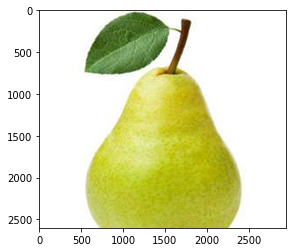

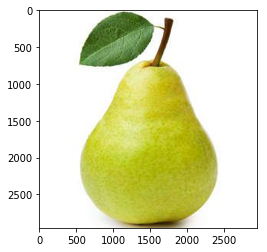

1.jpg
(2600, 2953, 3)


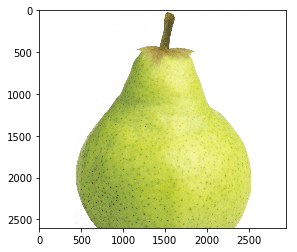

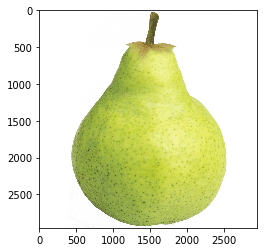

3.jpg
(2600, 2953, 3)


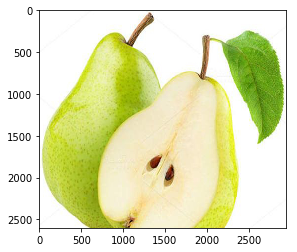

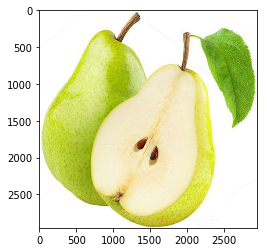

2.jpg
(2600, 2953, 3)


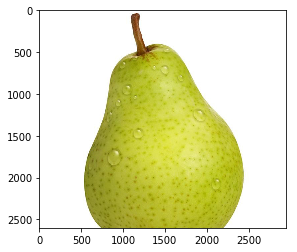

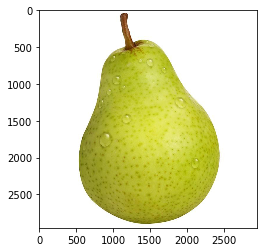

6.jpg
(2600, 2953, 3)


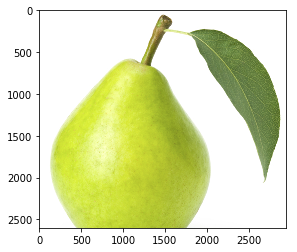

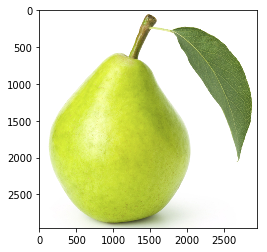

4.jpg
(2600, 2953, 3)


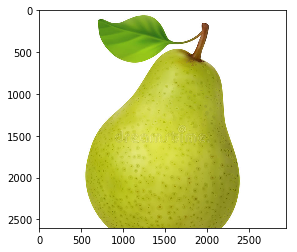

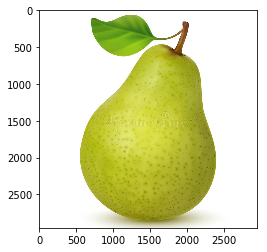

In [17]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os


di='/notebooks/images/pera'
# First, load the image again
dir_path = os.listdir(di)
print(dir_path)


for imgp in dir_path:
    print(imgp)  
    raw_image_data = mpimg.imread(di+'/'+imgp,"")
    image = tf.placeholder("float", [None, None, None])
    #slice(entrada,inicio,tamaño,name=None)
    r = tf.slice(image,[0,0,0],[-1,-1,1])
    g = tf.slice(image,[0,0,1],[-1,-1,1])
    b = tf.slice(image,[0,0,2],[-1,-1,1])


    #r = tf.scalar_mul(0.2126,r)
    #g = tf.scalar_mul(0.7152,g)
    #b = tf.scalar_mul(0.0722,b)
    grey = tf.add(r,tf.add(g,b))

    #concat(valores,eje,name='concat{})
    #out = tf.concat(2, [r,g,b])
    #out = tf.concat(2, [grey,grey, grey])
    
    out = tf.concat([r,g,b],2)
    out = tf.cast(out, tf.uint8)
    
    imgp2 = tf.placeholder("uint8", [None, None, 3])
# tf.slice(image2, [inicio, inicio, inicio], [filas, -1, -1])
    slice = tf.slice(imgp2, [0, 0, 0], [2600, -1, -1])
        
    with tf.Session() as session:
        result = session.run(slice, feed_dict={imgp2: raw_image_data})
        print(result.shape)

    plt.imshow(result)
    plt.show()

    with tf.Session() as session:
        result = session.run(out, feed_dict={image: raw_image_data})
        plt.imshow(result)
        plt.show()